# Naive Bayes Classifier on E-mail Classification

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Feature Extraction and Build Dataset

The email data file is on: https://github.com/justmarkham/DAT5/blob/master/data/SMSSpamCollection.txt

In [2]:
class dataloader:
    def __inti__(self):
        None
        
    def loadfile(self, filepath):
        f = open(filepath,'r')
        data = [line.strip() for line in f]
        data = pd.DataFrame(np.array([data[i].split("\t") for i in range(len(data))]), columns=("label", "content"))
        data["label"] = data["label"].replace(["ham", "spam"], [-1, 1])
        self.data = data
        self.y = data["label"]

    def datatransform(self, data=None, new_data=False):
        vectorizer = CountVectorizer(strip_accents='ascii', token_pattern="[^\W\d_]+")
        X = vectorizer.fit_transform(self.data["content"])
        self.col = vectorizer.get_feature_names_out()
        self.X = X.toarray()
        if new_data == True:
            X_ = vectorizer.transform(data).toarray()
            return X_

In [3]:
file = 'SMSSpamCollection.txt'
dataset = dataloader()
dataset.loadfile(file)
dataset.datatransform()
X, y, col  = dataset.X, dataset.y, dataset.col
dataset.data.head()

,label,content
0,-1,"Go until jurong point, crazy.. Available only ..."
1,-1,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,-1,U dun say so early hor... U c already then say...
4,-1,"Nah I don't think he goes to usf, he lives aro..."


# Build NB(Naive Bayes) Classifier Model

In [4]:
class NBC:
    def __init__(self, X, y, col):
        self.X = np.array(X)
        self.y = np.array(y) #label
        self.col = col
        self.p_y = np.zeros(2)
        self.p_x_y = np.zeros((2, len(self.X.T)))
    
    def train(self):
        self.p_y[0] = np.sum(self.y==+1)/len(self.y) #p(y+)
        self.p_y[1] = np.sum(self.y==-1)/len(self.y) #p(y-)
        for d in range(len(self.X.T)):
            self.p_x_y[0][d] = (np.sum(self.X.T[d][y==+1]>=1)+1) / (np.sum(self.X.T[d][y==+1]>=0)+2) #p(x|y+)
            self.p_x_y[1][d] = (np.sum(self.X.T[d][y==-1]>=1)+1) / (np.sum(self.X.T[d][y==-1]>=0)+2) #p(x|y-)
        
    def pred(self, x):
        y_pred = np.array([])
        for d in range(1 if x.ndim == 1 else len(x)):
            p_X_y = np.ones(2)
            p_x_y = abs(1-(x[d]>=1)-self.p_x_y)
            for i in range(len(p_x_y[0])):
                p_X_y *= p_x_y[:,i] #p(X|y) = Πp(x|y)
            p_x = p_X_y[0]*self.p_y[0]+p_X_y[1]*self.p_y[1] #p(x)
            y_pred = np.append(y_pred, 1 if (p_X_y[0]*self.p_y[0]/p_x >= p_X_y[1]*self.p_y[1]/p_x) else -1) #p(y|x) = p(x|y)*p(y)/p(x)
        return y_pred
    
    def valid(self):
        accuracy = np.sum(self.y==self.pred(self.X))/len(self.X)
        return accuracy

# Vaild the dataset

Accuracy: 98.816 %


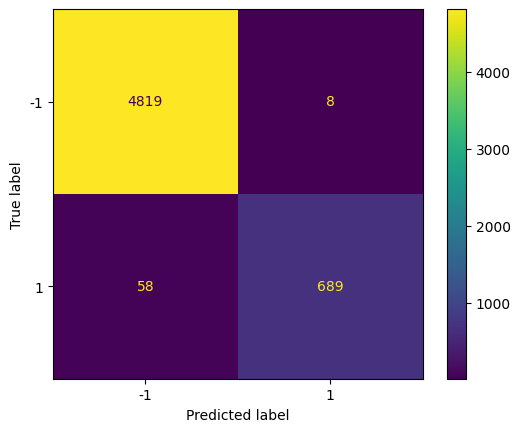

In [5]:
model = NBC(X, y, col)
model.train()
y_pred = model.pred(X)
#print(f"Accuracy: {model.valid()*100:.3f} %")
print(f"Accuracy: {(np.sum(y==y_pred)/len(y))*100:.3f} %")
cm = confusion_matrix(y, y_pred, labels=[-1, 1])
cm_display = ConfusionMatrixDisplay(cm, display_labels=[-1, 1])
cm_display.plot()
plt.show()

# Test the new data

In [6]:
# test1, test2 are [spam, ham]
test1 = "You are a winner U have been specially selected 2 receive £1000 cash or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810810"
test2 = "I just reached home. I go bathe first. But my sis using net tell u when she finishes k..."
test = np.array([test1, test2])

In [7]:
X_ = dataset.datatransform(data=test, new_data=True)
print("Naive Bayes Predict(1:spam, -1:ham):", model.pred(X_))

Naive Bayes Predict(1:spam, -1:ham): [ 1. -1.]
